# Polynomial Linear Regression

### importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


### Obtaining Data

In [2]:
df=pd.read_csv('../FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


## Simple plotting

In [4]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [5]:
features=['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']
cdf=df[features]

### ploting between enginesize and CO2 emission

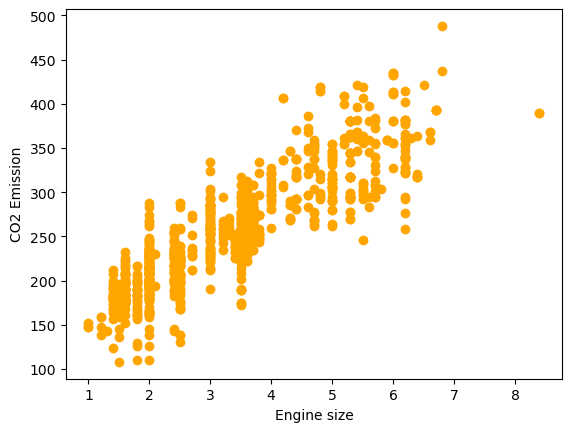

In [6]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='orange')
plt.xlabel('Engine size')
plt.ylabel('CO2 Emission')
plt.show()

### ploting between Cylinder and CO2 emission

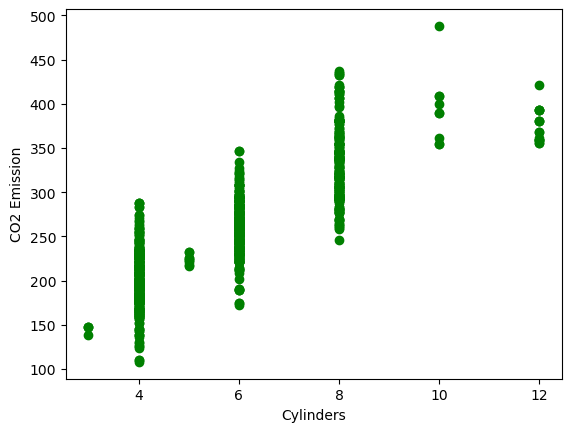

In [7]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color='green')
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emission')
plt.show()

## Creating train and test data
80% of the given data is trained and rest 20% is used for testing

In [8]:
msk=np.random.rand(len(df)) < 0.8
train=cdf[msk]
test=cdf[~msk]

## Polynomial Regression

We can take n-degree polynomial Equation.\
Here we are taking 2nd degree polynomial equation.\
$$y=b + \theta_1x + \theta_2x^2$$


In [9]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly=PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

Polynomial regression is a special case of multiple linear regression. If $x$ is replaced by $x_1$ and $x^2$ is replaced by $x_2$ then we can rewrite the equation as follows.
$$y = b + \theta_1x_1 + \theta_2x_2$$

In [10]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

print(f"Coefficent : {clf.coef_}")
print(f'Intercept : {clf.intercept_}')

Coefficent : [[ 0.         51.55077501 -1.60736884]]
Intercept : [105.78789366]


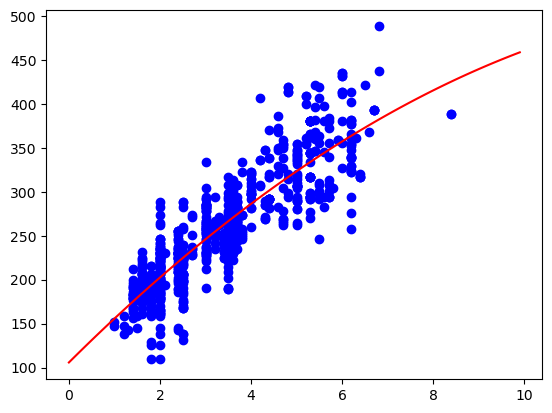

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*XX**2
plt.plot(XX, yy, '-r' )
plt.show()

## Evaluation

In [12]:
from sklearn.metrics import r2_score

test_poly_x = poly.fit_transform(test_x)
test_y_=clf.predict(test_poly_x)

print(f"Mean absolute error : {np.mean(np.absolute(test_y_-test_y))}")
print(f"Residual Sum of Squares (MSE): {np.mean((test_y_ - test_y)**2)}")
print(f"R2-Score : {r2_score(test_y,test_y_)}")

Mean absolute error : 22.01039776459075
Residual Sum of Squares (MSE): 844.8887377870522
R2-Score : 0.7548926780383761


## For Cylinders data

In [13]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

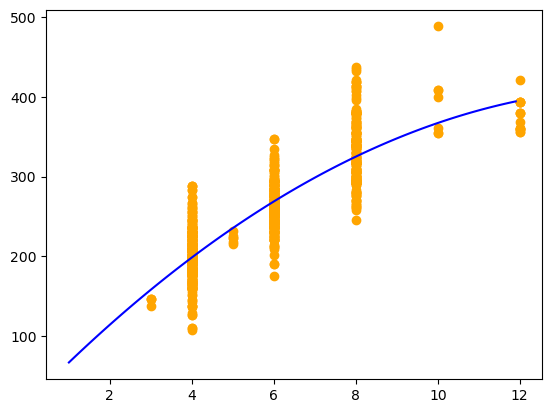

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model


features = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']
cdf = df[features]

msk = np.random.rand(len(df))<0.8
train=cdf[msk]
test=cdf[~msk]

train_x = np.asanyarray(train[['CYLINDERS']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['CYLINDERS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly=PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

clf=linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly,train_y)

xx=np.arange(1,12,0.1)
yy=clf.intercept_[0] + clf.coef_[0][1]*xx + clf.coef_[0][2]*xx**2 
plt.plot(xx,yy,color='blue')
plt.scatter(train_x,train_y,color='orange')
plt.ylabel='CO2 Emissiions'
plt.xlabel='Number of Cylinder'
plt.show()

In [15]:
from sklearn.metrics import r2_score

poly_test_x = poly.fit_transform(test_x)
test_y_ = clf.predict(poly_test_x)

print(f"Mean absolute error : {np.mean(np.absolute(test_y_-test_y))}")
print(f"Residual sum of squares (MSE) : {np.mean((test_y_ - test_y)**2)}")
print(f"R2 score : {r2_score(test_y,test_y_)}")

Mean absolute error : 26.17265112140558
Residual sum of squares (MSE) : 1154.0381224561202
R2 score : 0.6992983025826869


## For Fuel consumption combination data

In [16]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

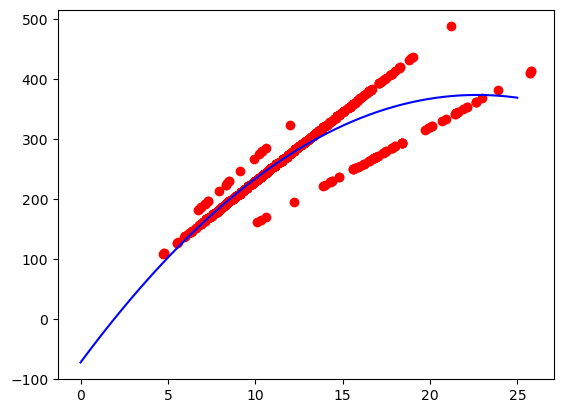

In [17]:
from sklearn.preprocessing import PolynomialFeatures

features = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']
cdf = df[features]

msk = np.random.rand(len(df))<0.8
trian=cdf[msk]
test=cdf[~msk]

train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly=PolynomialFeatures(degree=2)
poly_x=poly.fit_transform(train_x)
poly_x

from sklearn import linear_model

clf=linear_model.LinearRegression()
clf.fit(poly_x,train_y)

xx=np.arange(0,25,0.01)
yy=clf.intercept_[0] + clf.coef_[0][1]*xx + clf.coef_[0][2]*xx**2
plt.scatter(train_x,train_y,color='red')
plt.plot(xx,yy,color='blue')
plt.show()


In [18]:
from sklearn.metrics import r2_score

test_poly_x = poly.fit_transform(test_x)
test_y_ = clf.predict(test_poly_x)

print(f"Mean absolute error : {np.mean(np.absolute(test_y_-test_y))}")
print(f"Residual sum of squares (MSE) : {np.mean((test_y_ - test_y)**2)}")
print(f"R2 score : {r2_score(test_y,test_y_)}")

Mean absolute error : 14.152087811218403
Residual sum of squares (MSE) : 649.9508661059184
R2 score : 0.8347504361867021
